In [1]:
import pandas as pd
from datetime import date
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
data = pd.read_csv(r'C:\Users\mushirih\Desktop\projs\jupyter\Oct20\data\Walmart_Store_sales.csv')

In [4]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
Store           6435 non-null int64
Date            6435 non-null object
Weekly_Sales    6435 non-null float64
Holiday_Flag    6435 non-null int64
Temperature     6435 non-null float64
Fuel_Price      6435 non-null float64
CPI             6435 non-null float64
Unemployment    6435 non-null float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [6]:
data.max()

Store                    45
Date             31-12-2010
Weekly_Sales    3.81869e+06
Holiday_Flag              1
Temperature          100.14
Fuel_Price            4.468
CPI                 227.233
Unemployment         14.313
dtype: object

In [8]:
# max sales
data.loc[data['Weekly_Sales']==data['Weekly_Sales'].max()]

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
1905,14,24-12-2010,3818686.45,0,30.59,3.141,182.54459,8.724


In [10]:
# standard deviation and coeff of variance'
# what store has sales that vary alot
maxstd = pd.DataFrame(data.groupby('Store').agg({'Weekly_Sales':['std','mean']}))
maxstd=maxstd.reset_index()
maxstd['CoV']=(maxstd[('Weekly_Sales','std')]/maxstd[('Weekly_Sales','mean')])*100

maxstd.loc[maxstd[('Weekly_Sales','std')]==maxstd[('Weekly_Sales','std')].max()]

Store   Weekly_Sales                      CoV
                    std          mean           
13    14  317569.949476  2.020978e+06  15.713674

In [12]:
# store with good quarterly growth in Q3 2012
data['Date'] = pd.to_datetime(data['Date'])

Q3_date_from = pd.Timestamp(date(2012,7,1))
Q3_date_to = pd.Timestamp(date(2012,9,30))

Q2_date_from = pd.Timestamp(date(2012,4,1))
Q2_date_to = pd.Timestamp(date(2012,6,30))

Q2data=data[(data['Date']>Q2_date_from) & (data['Date']<Q2_date_to)]
Q3data=data[(data['Date']>Q3_date_from) & (data['Date']<Q3_date_to)]

#finding the sum weekly sales of each store in Q2
Q2 = pd.DataFrame(Q2data.groupby('Store')['Weekly_Sales'].sum())
Q2.reset_index(inplace=True)
Q2.rename(columns={'Weekly_Sales':'Q2_Weekly_Sales'}, inplace=True)

#finding the sum weekly sales of each store in Q3
Q3 = pd.DataFrame(Q3data.groupby('Store')['Weekly_Sales'].sum())
Q3.reset_index(inplace=True)
Q3.rename(columns={'Weekly_Sales':'Q3_Weekly_Sales'}, inplace=True)

Q3_Growth = Q2.merge(Q3, how='inner', on='Store')
Q3_Growth.head()

,Store,Q2_Weekly_Sales,Q3_Weekly_Sales
0,1,21036965.58,18633209.98
1,2,25085123.61,22396867.61
2,3,5562668.16,4966495.93
3,4,28384185.16,25652119.35
4,5,4427262.21,3880621.88


In [13]:
Q3_Growth['Growth_Rate'] = (Q3_Growth['Q3_Weekly_Sales']-Q3_Growth['Q2_Weekly_Sales'])/Q3_Growth['Q2_Weekly_Sales']

Q3_Growth['Growth_Rate']= round(Q3_Growth['Growth_Rate'],2)
Q3_Growth.sort_values('Growth_Rate', ascending=False).head()

,Store,Q2_Weekly_Sales,Q3_Weekly_Sales,Growth_Rate
15,16,6626133.44,6441311.11,-0.03
6,7,7613593.92,7322393.92,-0.04
34,35,10753570.97,10252122.68,-0.05
22,23,18283424.90,17103654.36,-0.06
25,26,13218289.66,12417575.35,-0.06


In [14]:
Q3_Growth.sort_values('Growth_Rate', ascending=False).tail()

,Store,Q2_Weekly_Sales,Q3_Weekly_Sales,Growth_Rate
4,5,4427262.21,3880621.88,-0.12
28,29,7034493.19,6127862.07,-0.13
35,36,4090378.90,3578123.58,-0.13
44,45,10278900.05,8851242.32,-0.14
13,14,24427769.06,20140430.40,-0.18


In [15]:
# QUESTION 4:- Some holidays have a negative impact on sales. 
# Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together.

data.groupby('Holiday_Flag')['Weekly_Sales'].mean()

Holiday_Flag
0    1.041256e+06
1    1.122888e+06
Name: Weekly_Sales, dtype: float64

In [21]:
#marking the holiday dates 
Christmas1 = pd.Timestamp(date(2010,12,31) )
Christmas2 = pd.Timestamp(date(2011,12,30) )
Christmas3 = pd.Timestamp(date(2012,12,28) )
Christmas4 = pd.Timestamp(date(2013,12,27) )

Thanksgiving1=pd.Timestamp(date(2010,11,26) )
Thanksgiving2=pd.Timestamp(date(2011,11,25) )
Thanksgiving3=pd.Timestamp(date(2012,11,23) )
Thanksgiving4=pd.Timestamp(date(2013,11,29) )

LabourDay1=pd.Timestamp(date(2010,2,10) )
LabourDay2=pd.Timestamp(date(2011,2,9) )
LabourDay3=pd.Timestamp(date(2012,2,7) )
LabourDay4=pd.Timestamp(date(2013,2,6) )

SuperBowl1=pd.Timestamp(date(2010,9,12) )
SuperBowl2=pd.Timestamp(date(2011,9,11) )
SuperBowl3=pd.Timestamp(date(2012,9,10) )
SuperBowl4=pd.Timestamp(date(2013,9,8) )

In [22]:
Christmas_mean_sales = data[(data['Date']==Christmas1)|(data['Date']==Christmas2)|(data['Date']==Christmas3)|(data['Date']==Christmas4)]
Thanksgiving_mean_sales = data[(data['Date']==Thanksgiving1)|(data['Date']==Thanksgiving2)|(data['Date']==Thanksgiving3)|(data['Date']==Thanksgiving4)]
LabourDay_mean_sales = data[(data['Date']==LabourDay1)|(data['Date']==LabourDay2)|(data['Date']==LabourDay3)|(data['Date']==LabourDay4)]
SuperBowl_mean_sales = data[(data['Date']==SuperBowl1)|(data['Date']==SuperBowl2)|(data['Date']==SuperBowl3)|(data['Date']==SuperBowl4)]

In [24]:
list_of_mean_sales = {
    'Christmas_mean_sales':round(Christmas_mean_sales['Weekly_Sales'].mean(),2),
    'Thanksgiving_mean_sales': round(Thanksgiving_mean_sales['Weekly_Sales'].mean(),2),
    'LabourDay_mean_sales': round(LabourDay_mean_sales['Weekly_Sales'].mean(),2),
    'SuperBowl_mean_sales': round(SuperBowl_mean_sales['Weekly_Sales'].mean(),2),
    'Non holiday weekly sales': data[data['Holiday_Flag']==0]['Weekly_Sales'].mean()                              
}

list_of_mean_sales

{'Christmas_mean_sales': 960833.11,
 'Thanksgiving_mean_sales': 1471273.43,
 'LabourDay_mean_sales': 1008369.41,
 'SuperBowl_mean_sales': nan,
 'Non holiday weekly sales': 1041256.3802088564}

C:\Users\mushirih\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Weekly sales')

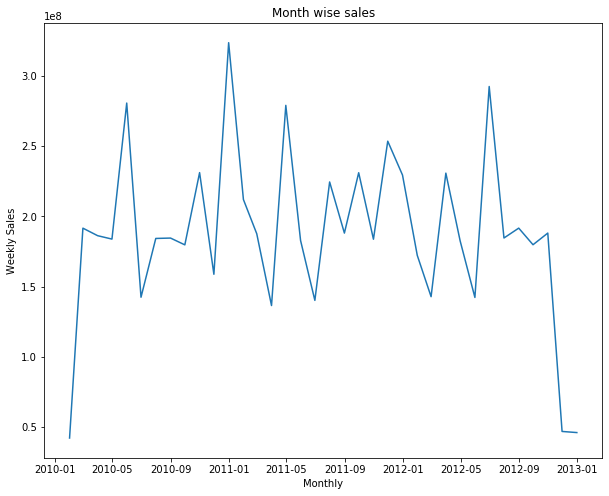

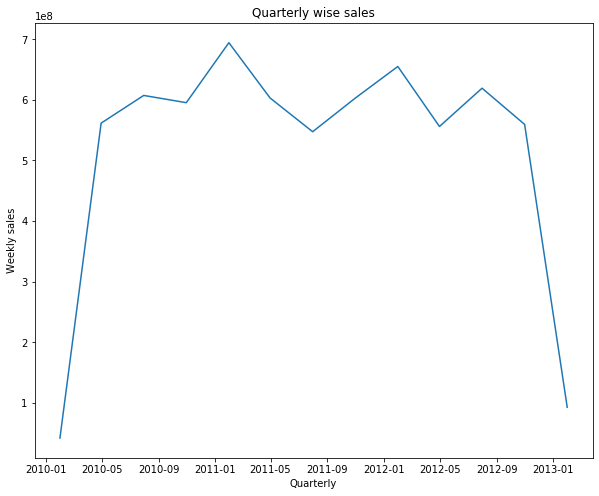

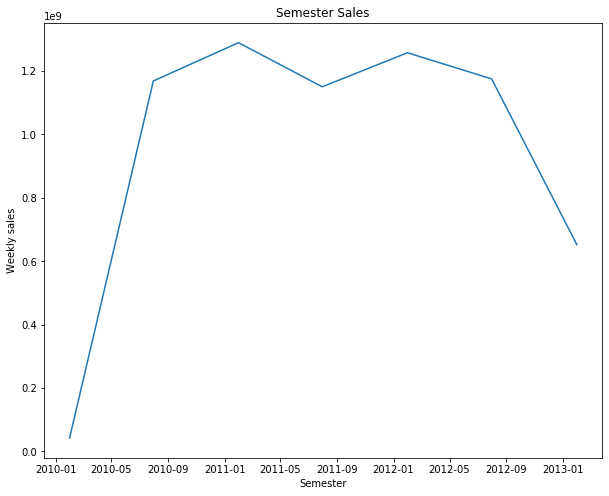

In [25]:
# QUESTION 5 :-Provide a Monthly,Quaterly and Semester view of sales in units and give insights.
monthly = data.groupby(pd.Grouper(key='Date', freq = '1M')).sum()
monthly = monthly.reset_index()
fig, ax = plt.subplots(figsize=(10,8))
X= monthly['Date']
Y = monthly['Weekly_Sales']
plt.plot(X,Y)
plt.title('Month wise sales')
plt.xlabel('Monthly')
plt.ylabel('Weekly Sales')

Quarterly = data.groupby(pd.Grouper(key='Date',freq='3M')).sum()
Quarterly = Quarterly.reset_index()
fig, ax = plt.subplots(figsize=(10,8))
X = Quarterly['Date']
Y = Quarterly['Weekly_Sales']
plt.plot(X,Y)
plt.title('Quarterly wise sales')
plt.xlabel('Quarterly')
plt.ylabel('Weekly sales')

Semester = data.groupby(pd.Grouper(key='Date', freq='6M')).sum()
Semester= Semester.reset_index()
fig, ax = plt.subplots(figsize=(10,8))
X= Semester['Date']
Y= Semester['Weekly_Sales']
plt.plot(X,Y)
plt.title('Semester Sales')
plt.xlabel('Semester')
plt.ylabel('Weekly sales')
